# **Foundations of Data Science Fall 2022 - Homework 1 (32 points)**

### Student Name: Pranjal Jain
### Student Net Id: pj2069

---



### **Part 0: Data Exploration and Linear Regression (5 Points)**

---


In [ ]:
# Importing all important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Downloading data

fn_src ='https://drive.google.com/uc?export=download&id=1RzQpKONOcXSMxH2ZzOI4iVMiTgD6ttSl'
fn_dst ='eeg_dat.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    print('Fetching file %s [53MB].  This may take a minute..' % fn_dst)
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File eeg_dat.p is already downloaded


In [ ]:
# Loading data

import pickle
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

>>**1**\. **(1 Point)** *Display the first 5 rows of X and Y and print the dimensions for both datasets*



In [ ]:
# Write your code here
# print(X[0:5])
# print(Y[0:5])

Y1 = Y
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

print(X.head(5))
print(Y.head(5))

print("Shape of X is :", X.shape)
print("Shape of Y is :", Y.shape)

      0         1         2         3         4         5         6      \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3 -0.005298  0.004913  0.005980 -0.017285  0.003744  0.002225  0.008631   
4 -0.015230  0.000591 -0.001915  0.005686 -0.003713 -0.003756 -0.029076   

      7         8         9      ...     22484     22485     22486     22487  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3 -0.000307  0.001637 -0.011145  ... -0.000478  0.001342  0.001086 -0.006260   
4  0.004742 -0.001302  0.003479  ... -0.001062  0.001559 -0.003527  0.002363   

      22488     22489     22490     22491     22492     22493  
0  0

Background: This is an ECG dataset that contains voltage measurements from a number of points on the scalp. A common task is to estimate which parts of the brain caused the measured response, which can help identify which parts of the brain are involved in specific tasks. However, the number of possible locations in the brain is much larger than the number of measurements, which makes this an appropriate task to assess the use of regularization to determine the brain region that is active under stimulus.

In particular, there are three key variables:
* `nt`    = number of time steps that we measure data
* `nchan` = number of channels (i.e. electrodes) measured in each time step
* `ncur`  = number of currents in the brain that we want to estimate.  

Each current comes from one brain region (called a *voxel*) in either the `x`, `y` or `z` direction.  So,

    nvoxels = ncur / 3
    
The components of the `X` and `Y` matrices are:
*  `Y[i,k]` = electric field measurement on channel `i` at time `k`
*  `X[i,j]` = sensitivity of channel `i` to current `j`.



>>**2**\. **(1 Point)** Split the data into training and testing. What split do you use, and why?

>>[Place your answer here regarding the split]

Answer: The split I use is 66:33 since we have low training data, the model will be of high variance and we require more test data.

In [ ]:
# Write your code here
X_tr, X_ts, y_tr, y_ts = train_test_split(X,Y,test_size=0.33,shuffle=True)

>>**3**\. **(3 Points)** Perform linear regression. As a reminder, the optimization for linear regression using ordinary least squares is written below, the data consists of $n$ observations {$x_i$,$y_i$}. Each observation $i$ includes a scalar response $y_i$ and a column vector $x_i$ of $p$ variables (regressors).

>>The evaluation metric used for linear regression is the $R^2$ score. Explain what $R^2$ tells us, and interpret your results based on this.*



\begin{align}
\text{Ordinary Least Squares}
\end{align}
 
 

 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - β_o - \sum_{j=1}^p β_jx_{ij}  \right)^2  \right]
    \end{align}



In [ ]:
# Write your code here
from sklearn.linear_model import LinearRegression

regrL = LinearRegression()
regrL.fit(X_tr, y_tr)

y_pred_test = regrL.predict(X_ts)
rsq_ts= r2_score(y_ts, y_pred_test)

y_pred_train = regrL.predict(X_tr)
rsq_tr= r2_score(y_tr, y_pred_train)

print(rsq_ts)
print(rsq_tr)


-4.813915326588146
1.0


>>Place your written answer here.

The data has shown to have good fit for training data but a terrible fit for the test data. This is caused by overfiting and having high bias learned by having more features than the training examples. For a more accurate model, we need to understand which features are relevant and which are having no use case in our model.

### **Part 1: Ridge Regularization (10 Points)**

---


>>**1**\. **(1 Point)** *Now we will use ridge regression, a method that is used to analyse data that suffers from multicollinearity. Notice the regularization term added to the optimization below, which uses the squared value of $β$. It is also known as L2 regularization. First, what is the degree of collinearity in the data? Show your work and give rationale for the degree of collinearity.*


\begin{align}
\text{Ridge Regression}
\end{align}
 
 
 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_{ij}  \right)^2 + λ\sum_{j=1}^p|β_j|^2  \right]
    \end{align}


>>[Place your interpretation here]

>>**1b**\. **(2 Points)** *Now implement ridge regression using sklearn. Start with the default alpha value, and print the $R^2$ score*

In [ ]:
# Write your code here

regrR = Ridge()
regrR.fit(X_tr,y_tr)

y_pred_ts = regrR.predict(X_ts)
y_pred_tr = regrR.predict(X_tr)

rsq_tr = r2_score(y_tr, y_pred_tr)
rsq_ts= r2_score(y_ts, y_pred_ts)

print("R2 Train: ", rsq_tr)
print("R2 Test: ", rsq_ts)

R2 Train:  0.6075285800296725
R2 Test:  0.19137688023916294


>>**2**\. **(5 Points)** *Now we will look at what happens when varying the parameter. Try 10 different values for alpha and print the alpha value with corresponding $R^2$ score using Cross-Validation for training data. Describe how you pick the range of alpha values to examine.* 



>>[Place your reasoning for the alpha values here]

Alpha vales were taken in this manner as we want to find a range where $R^2$ values are the highest. Since we are determining highest $R^2$ values, we can take a logspace between 0.01 to 100 and find corresponding values.



In [ ]:
# Write your code here
alphas = np.logspace(-2,2,10)
rsq = list()
for i in alphas:
  regr = RidgeCV(alphas = [i], cv = 10)
  regr.fit(X_tr, y_tr)
  y_pred_ridge=regr.predict(X_ts)
  rsq_i= r2_score(y_ts, y_pred_ridge)
  rsq.append(rsq_i)
  print("Alpha:",i ,"\t RSQ: %.4f"%rsq_i)

Alpha: 0.01 	 RSQ: -0.1775
Alpha: 0.027825594022071243 	 RSQ: 0.0330
Alpha: 0.0774263682681127 	 RSQ: 0.1595
Alpha: 0.21544346900318834 	 RSQ: 0.2169
Alpha: 0.5994842503189409 	 RSQ: 0.2132
Alpha: 1.6681005372000592 	 RSQ: 0.1607
Alpha: 4.6415888336127775 	 RSQ: 0.0924
Alpha: 12.915496650148826 	 RSQ: 0.0416
Alpha: 35.93813663804626 	 RSQ: 0.0154
Alpha: 100.0 	 RSQ: 0.0040


>>**3**\. **(2 Points)** What is the highest $R^2$ you can achieve?

Optimal RSQ: 0.21688
[-0.17748381  0.03303656  0.15948711  0.21687927  0.213198    0.16069535
  0.09241065  0.04164972  0.0153547   0.00399081]


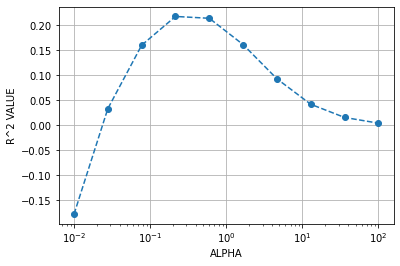

In [ ]:
# Write your code here
rsq = np.array(rsq)
plt.semilogx(alphas, rsq, '--o')
plt.ylabel('R^2 VALUE')
plt.xlabel('ALPHA')
plt.grid()
rsq_max=np.max(rsq)
print('Optimal RSQ: %.5f' %rsq_max)
print(rsq)

### **Part 2: Lasso Regularization (12 Points)**

---


>>**1**\. **(3 Points)** *Another method often used to improve performance is Lasso regularization. Lasso regression improves performance by using shrinkage, where data values are shrunk towards a central point, like the mean. Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in sparse models with few coefficients. Some of the coefficients can become zero and eliminated from the model. Implement this using sklearn with default parameter values and print the $R^2$ score*

 \begin{align}
\text{LASSO Regression}
\end{align}
 
 
 
 \begin{align}
        \underset{\beta}{\operatorname{arg min}}
        \left[\sum_{i=1}^n \left( y_i - βo - \sum_{j=1}^p β_jx_ij  \right)^2 + λ\sum_{j=1}^p|β_j|  \right]
    \end{align}

In [ ]:
# Write your code here
alpha = 1e-3
regLa = Lasso(alpha=alpha, max_iter=100, tol=0.01)
regLa.fit(X_tr, y_tr)

y_pred_lasso_test = regLa.predict(X_ts)
rsq_lasso = r2_score(y_ts,y_pred_lasso_test)
print("RSQ: ",rsq_lasso)

RSQ:  0.1932085098826353


>>**2**\. **(5 Points)** *Try 10 different values for the regularization parameter Alpha and print the alpha value with corresponding $R^2$ score using cross-validation. Again, give your reasoning for the choices of alpha. If you choose to tune any other hyperparameters of the model then justify your reason for it* 


>>[Give your reasoning here]
Alpha vales were taken in this manner as we want to find a range where $R^2$ values are the highest. Since we are determining highest $R^2$ values, we can take a logspace between 0.0001 to 0.001 and find corresponding values.

We tune Max iteration as we want to run the optimisation only a certain number of times, and so that it wont run for too long. We can also mention tolerence so that it checks for the dual gap for every update

In [ ]:
# Write your code here
Alphas=np.logspace(-4, -3, 10)
rsq=list()

for i in Alphas:
  regLa2=Lasso(alpha = i, max_iter = 100, tol = 0.01)
  regLa2.fit(X_tr, y_tr)
  y_pred_i = regLa2.predict(X_ts)
  rsq_i = r2_score(y_ts, y_pred_i)
  rsq.append(rsq_i)
  print("Alpha value ",i , '\t RSQ value:',rsq_i)
  

Alpha value  0.0001 	 RSQ value: 0.2937215171265436
Alpha value  0.0001291549665014884 	 RSQ value: 0.30707898361681474
Alpha value  0.0001668100537200059 	 RSQ value: 0.31294829170600086
Alpha value  0.00021544346900318845 	 RSQ value: 0.3173158216615174
Alpha value  0.0002782559402207126 	 RSQ value: 0.3196442304028969
Alpha value  0.00035938136638046257 	 RSQ value: 0.3181372571178091
Alpha value  0.00046415888336127773 	 RSQ value: 0.3072923687231512
Alpha value  0.0005994842503189409 	 RSQ value: 0.2844505354754512
Alpha value  0.000774263682681127 	 RSQ value: 0.2477490116565578
Alpha value  0.001 	 RSQ value: 0.1932085098826353


>>**3**\. **(2 Point)** *Plot a graph for different Alpha values and corresponding R^2 score. Explain the shape of the curve.*

The optimal RSQ: 0.320


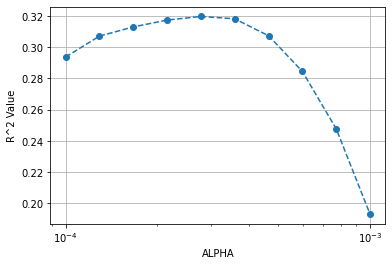

In [ ]:
# Write your ocde here
rsq = np.array(rsq)
plt.semilogx(Alphas, rsq, '--o')
plt.grid()
plt.xlabel('ALPHA')
plt.ylabel('R^2 Value')
rsq_max =np.max(rsq)
print('The optimal RSQ: %.3f'%rsq_max)

>>[Provide your explanation here]

As we can see, the RSQ value goes up and then quickly decreases after a certain alpha rate, meaning that we are not able to optimise due to high alpha rate.

>>**4**\. **(2 Point)** *Which of the following two methods of Regularization worked better and why?*


>>[Place your explanantion here]

Lasso worked better than ridge as we can see the RSQ value of the later is lesser in comparison to the former. Since Lasso gives a bigger penalty in comparison to the ridge to collinear varaibles, we can eliminate many multicolinear variables and have a more regularised models.


### **Part 3: Logistic Regression (5 Points)**

---


**1. (1 point)** Now let's consider logistic regression. What is the difference betweeen a linear and logistic regression problem? Explain. (You may take the example of the dataset and task used in this assignment to explain how it would look different for a logistic regression problem)

>>[Place your answer here]
Linear regression is a supervised learning algorithm that helps predict a continous value output while Logistic regression helps predict the classification via a categorical variable.

To convert a linear regression task to a logistic regression, we need to convert the Output variable (the dependent variable) to a categorical one. For our dataset we can find what values are positive and which are negative count the total in an observation (row) if we have more positive than we can make the output as 1 else 0.

**2. (1 point )** Following your answer in the previous question, convert the dataset such that for the same outcome prediction task, a logistic regression is suitable. 

In [ ]:
# # place your code here
X_log1 = X[:][3]
X_log2 = X[:][5]

X_log = pd.concat([X_log1, X_log2], axis=1)


Y_log= Y1>0
Y_logMain = []

for i in Y_log:
    y_temp = False
    count = 0
    for y in i:
        if y == True:
            count+=1
            
    if count>42:
        y_temp = True
        
    Y_logMain.append(y_temp)

Y_logMain = np.asarray(Y_logMain)


**3. (1 point)** Split this new dataset into training and testing with a 2:1 split. Implement logistic regression. 

In [ ]:
# Place your code here
from sklearn.linear_model import LogisticRegression


X_tr_log, X_ts_log, Y_tr_log, Y_ts_log = train_test_split(X_log, Y_logMain, test_size=0.33)

logReg = LogisticRegression()
logReg.fit(X_tr_log, Y_tr_log)
Y_log_pred = logReg.predict(X_ts_log)

**4. (2 point)** Report the performance of the model on the test data using accuracy. Also plot the confusion matrix and ROC-AUC curve. What can you infer from this confusion matrix? Also can you compare the logistic and linear regressions?

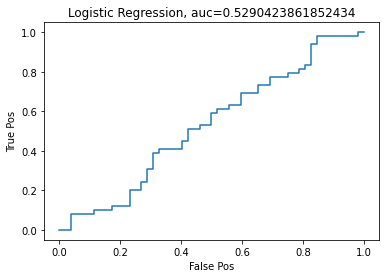

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


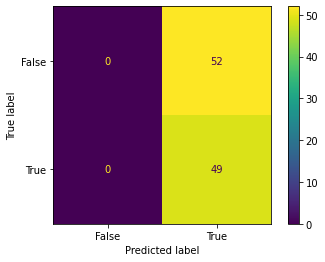

In [ ]:
# Place your code here
from sklearn.metrics import plot_confusion_matrix

y_pred_proba = logReg.predict_proba(X_ts_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_ts_log,  y_pred_proba)

auc = metrics.roc_auc_score(Y_ts_log, y_pred_proba)
plt.plot(fpr,tpr)
plt.title(label="Logistic Regression, auc="+str(auc))
plt.xlabel("False Pos")
plt.ylabel("True Pos")
plt.show()


plot_confusion_matrix(logReg, X_ts_log, Y_ts_log)

>>[ Place your explanation here ]
We can compare logistics with linear regression in the sense as they are two different tasks, achieving two different outcomes. One is achieving the classification of true or false and the other is predicting the value 

The confusion matrix displays this tradeoff by graphing the true positive rate vs. the false positive rate obtained.